In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [447]:
df = pd.read_csv('../data/gym_members_exercise_tracking.csv')

In [448]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [449]:
# check value counts for categorical data
df[['Gender']].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [450]:
df[['Workout_Type']].value_counts()

Workout_Type
Strength        258
Cardio          255
Yoga            239
HIIT            221
Name: count, dtype: int64

In [451]:
df[['Experience_Level']].value_counts()

Experience_Level
2                   406
1                   376
3                   191
Name: count, dtype: int64

In [452]:
# Data Cleaning
# 1. handling null values
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [453]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [454]:
# combine fields Session_Duration (hours) and Workout_Frequency (days/week)
df['Hours_Trained_Per_Week'] = df['Session_Duration (hours)'] * df['Workout_Frequency (days/week)']


# drop unnecessary columns
df = df.drop(columns=['Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Weight (kg)', 'Height (m)'])

df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI,Hours_Trained_Per_Week
0,56,Male,180,157,60,1313.0,Yoga,12.6,3.5,3,30.20,6.76
1,46,Female,179,151,66,883.0,HIIT,33.9,2.1,2,32.00,5.20
2,32,Female,167,122,54,677.0,Cardio,33.4,2.3,2,24.71,4.44
3,25,Male,190,164,56,532.0,Strength,28.8,2.1,1,18.41,1.77
4,38,Male,188,158,68,556.0,Strength,29.2,2.8,1,14.39,1.92


<Axes: xlabel='Hours_Trained_Per_Week'>

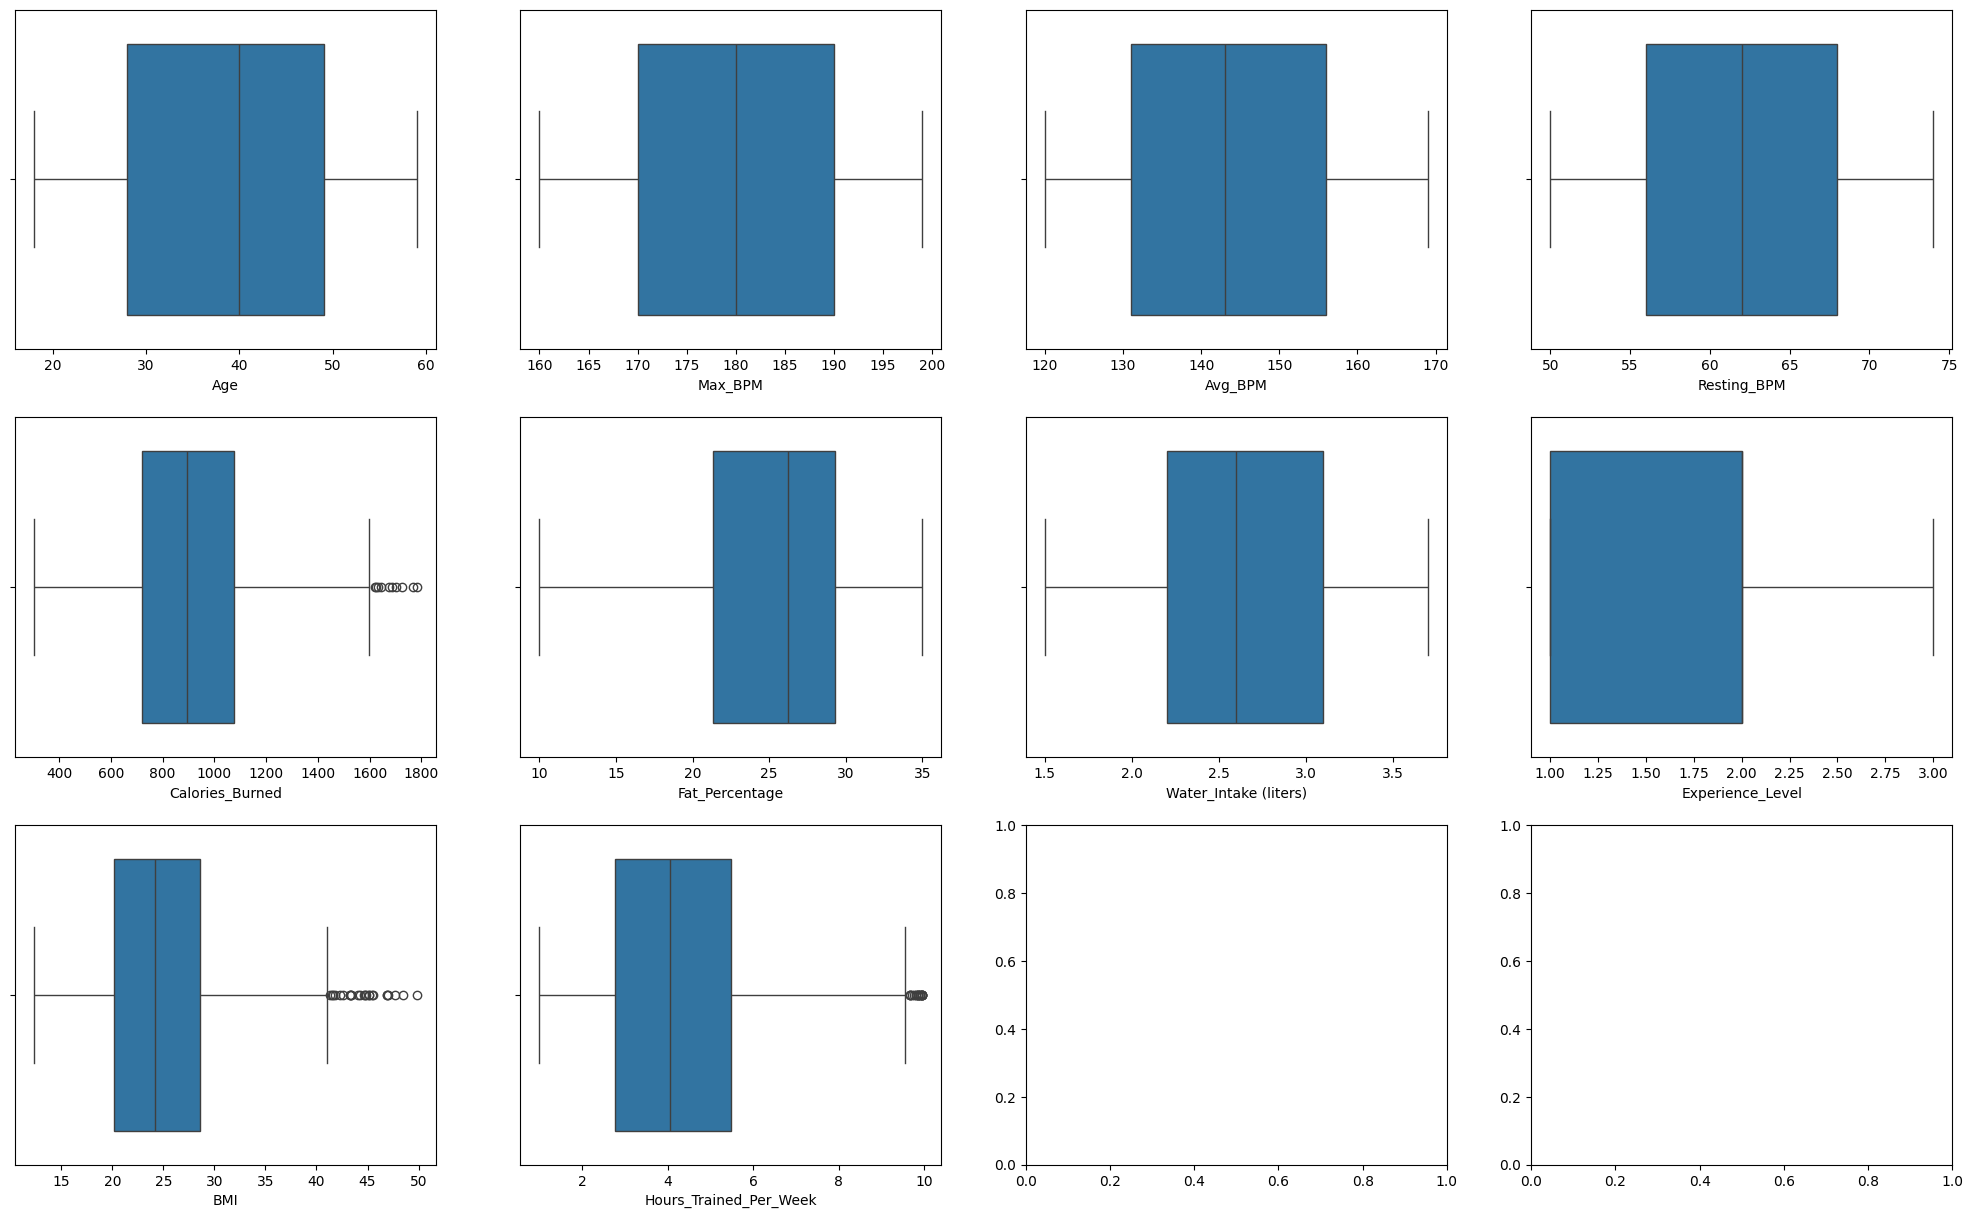

In [455]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,15))
sns.boxplot(x=df["Age"], ax=axs[0,0])
sns.boxplot(x=df["Max_BPM"], ax=axs[0,1])
sns.boxplot(x=df["Avg_BPM"], ax=axs[0,2])
sns.boxplot(x=df["Resting_BPM"], ax=axs[0,3])
sns.boxplot(x=df["Calories_Burned"], ax=axs[1,0])
sns.boxplot(x=df["Fat_Percentage"], ax=axs[1,1])
sns.boxplot(x=df["Water_Intake (liters)"], ax=axs[1,2])
sns.boxplot(x=df["Experience_Level"], ax=axs[1,3])
sns.boxplot(x=df["BMI"], ax=axs[2,0])
sns.boxplot(x=df['Hours_Trained_Per_Week'], ax=axs[2,1])


In [456]:
df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI,Hours_Trained_Per_Week
0,56,Male,180,157,60,1313.0,Yoga,12.6,3.5,3,30.20,6.76
1,46,Female,179,151,66,883.0,HIIT,33.9,2.1,2,32.00,5.20
2,32,Female,167,122,54,677.0,Cardio,33.4,2.3,2,24.71,4.44
3,25,Male,190,164,56,532.0,Strength,28.8,2.1,1,18.41,1.77
4,38,Male,188,158,68,556.0,Strength,29.2,2.8,1,14.39,1.92


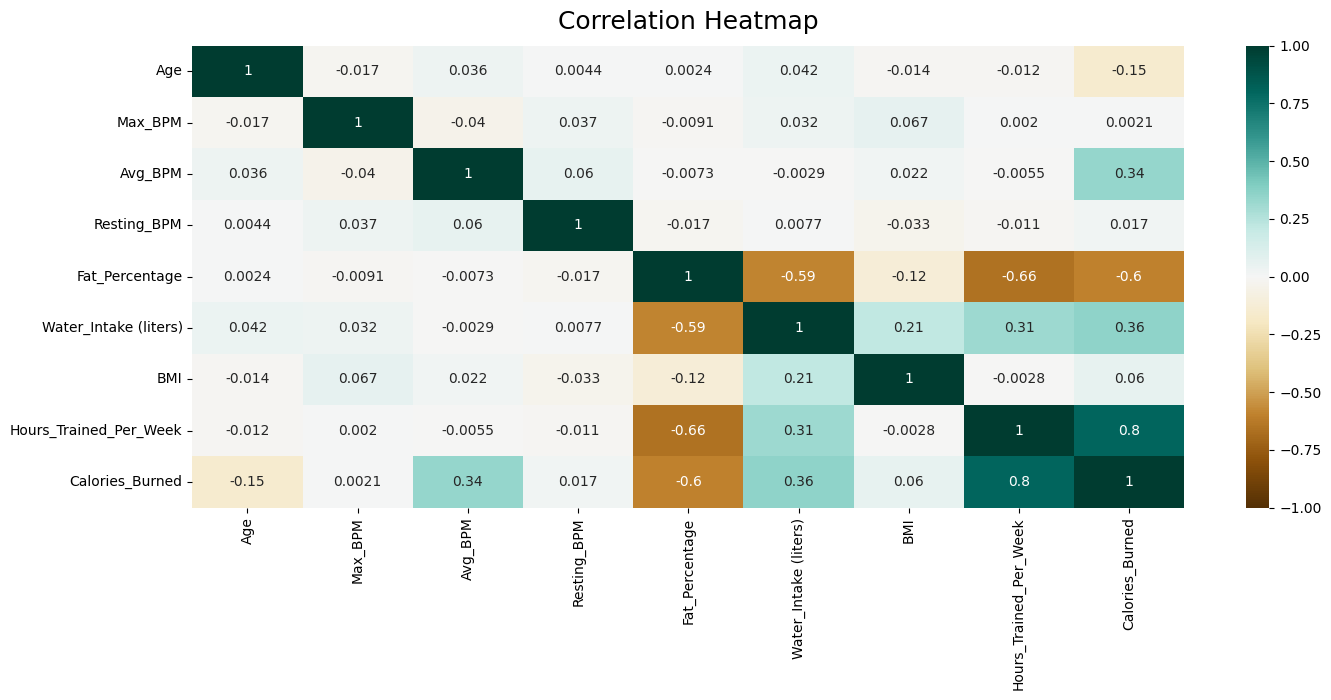

In [457]:
# Finding Correlation between columns
corr = df[['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Fat_Percentage', 'Water_Intake (liters)', 'BMI', 'Hours_Trained_Per_Week','Calories_Burned']].corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr,vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

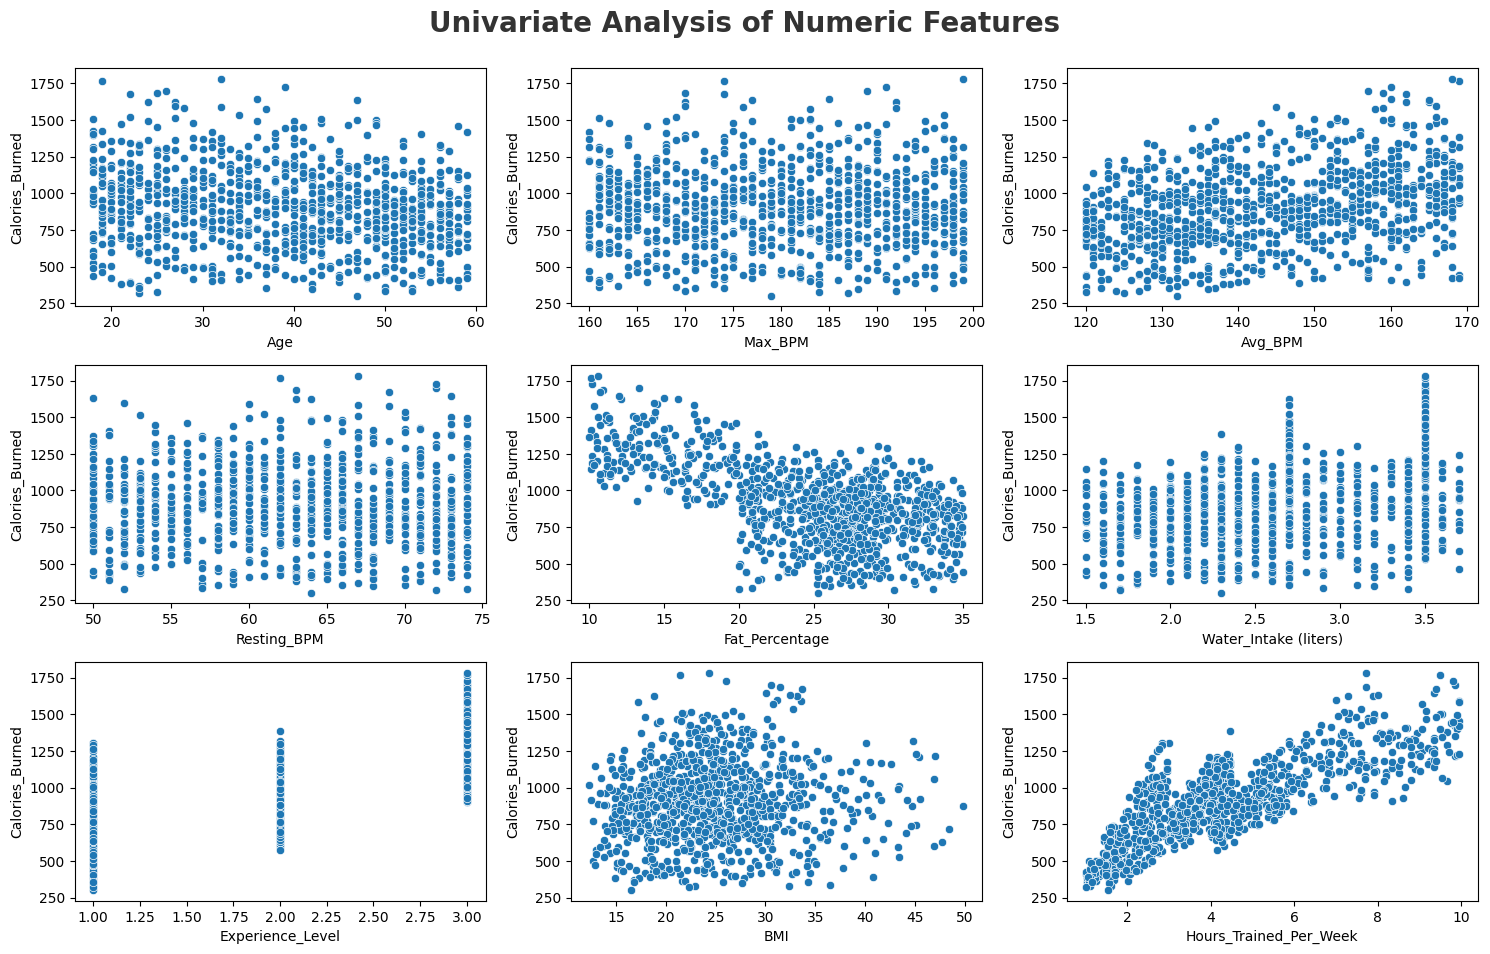

In [458]:
# Proportion of count data on categorical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numeric Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numerical_features = ['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Fat_Percentage', 'Water_Intake (liters)', 'Experience_Level', 'BMI', 'Hours_Trained_Per_Week']
for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df[numerical_features[i]],y=df['Calories_Burned'])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [459]:
# Split data into X and y
X = df.drop(columns=['Calories_Burned'], axis=1)
y = df['Calories_Burned']

# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=147)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(778, 11) (195, 11) (778,) (195,)


In [460]:
X_train.isnull().sum()

Age                       0
Gender                    0
Max_BPM                   0
Avg_BPM                   0
Resting_BPM               0
Workout_Type              0
Fat_Percentage            0
Water_Intake (liters)     0
Experience_Level          0
BMI                       0
Hours_Trained_Per_Week    0
dtype: int64

In [461]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Workout_Type'] = le.fit_transform(np.ravel(X_train[['Workout_Type']]))
X_test['Workout_Type'] = le.transform(np.ravel(X_test[['Workout_Type']]))

In [462]:
# Change Data Types for categorical data
X_train['Workout_Type'].astype(int)
X_test['Workout_Type'].astype(int)
X_train['Experience_Level'].astype(int)
X_test['Experience_Level'].astype(int)

482    1
128    1
292    1
92     2
308    2
      ..
673    3
282    1
547    1
663    3
192    1
Name: Experience_Level, Length: 195, dtype: int64

In [463]:
# #Reformatting data types (Converting strings/booleans into numerical datatype)
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop='first')
# ohe_encoded_train_data = pd.DataFrame(ohe.fit_transform(X_train[['Gender']]).astype(int).toarray(), columns=['Gender'])
# ohe_encoded_test_data = pd.DataFrame(ohe.fit_transform(X_test[['Gender']]).astype(int).toarray(), columns=['Gender'])
# X_train.drop(columns=['Gender'], axis=1, inplace=True)
# X_test.drop(columns=['Gender'], axis=1, inplace=True)
# X_train = pd.concat([X_train, ohe_encoded_train_data], axis=1)
# X_test = pd.concat([X_test, ohe_encoded_test_data], axis=1)

In [464]:
df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI,Hours_Trained_Per_Week
0,56,Male,180,157,60,1313.0,Yoga,12.6,3.5,3,30.20,6.76
1,46,Female,179,151,66,883.0,HIIT,33.9,2.1,2,32.00,5.20
2,32,Female,167,122,54,677.0,Cardio,33.4,2.3,2,24.71,4.44
3,25,Male,190,164,56,532.0,Strength,28.8,2.1,1,18.41,1.77
4,38,Male,188,158,68,556.0,Strength,29.2,2.8,1,14.39,1.92


In [465]:
# Feature selection 
features_to_drop = ['Age', 'Gender', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Water_Intake (liters)']

X_train.drop(columns=features_to_drop, axis=1, inplace=True)
X_test.drop(columns=features_to_drop, axis=1, inplace=True)
X_train.shape

(778, 5)

In [466]:
# Standard Scaling all the continuous variables
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
columns_to_scale = ['BMI', 'Fat_Percentage', 'Hours_Trained_Per_Week']

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[columns_to_scale]), columns=columns_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[columns_to_scale]), columns=columns_to_scale, index=X_test.index)

X_train.drop(columns=columns_to_scale, axis=1, inplace=True)
X_test.drop(columns=columns_to_scale, axis=1, inplace=True)
X_train = pd.concat([X_train, X_train_scaled], axis=1)
X_test = pd.concat([X_test, X_test_scaled], axis=1)

X_train_scaled.shape


(778, 3)

In [467]:
X_train.shape

(778, 5)

In [468]:
X_train.head()

,Workout_Type,Experience_Level,BMI,Fat_Percentage,Hours_Trained_Per_Week
242,0,1,-0.879763,0.971140,-0.995065
723,0,1,-0.878217,0.522230,-0.766202
96,3,1,2.475049,0.329841,-0.830284
825,3,1,-0.796280,0.313808,-1.333782
210,1,2,0.241084,1.163530,0.680211


In [469]:
X_train.drop(columns=[], axis=1, inplace=True)


In [470]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate_model_test(y_train, y_pred):
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = float(np.sqrt(mse))
    r_square = r2_score(y_train, y_pred)
    
    return mae, mse, rmse, r_square

def evaluate_model_train(true, pred, n, p):
    r_square = r2_score(true, pred)
    f_stat = float((r_square / (p-1)) / ((1-r_square) / (n-p)))
    f_p_value = float(1 - stats.f.cdf(f_stat, p-1, n-p))

    return f_stat, f_p_value


In [471]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
# Model training
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=30),
}

model_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    #Training
    model.fit(X_train, y_train)

    #Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    f_stat, f_p_value = evaluate_model_train(y_train, y_train_pred, X_train.shape[0], X_train.shape[1])
    mae, mse, rmse, r2_square = evaluate_model_test(y_test, y_test_pred)
    
    model_list.append({
        "ModelName":model_name,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "R2_score": r2_square,
        "F-Statistic": f_stat,
        "P-Value for F-Stat": f_p_value,
    })
    

In [472]:
metrics_data = pd.DataFrame(model_list)
metrics_data

,ModelName,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2_score,F-Statistic,P-Value for F-Stat
0,Linear Regression,140.014424,29328.940927,171.256944,0.661474,366.885436,1.110223e-16
1,Ridge,140.092647,29361.153433,171.350966,0.661102,366.872067,1.110223e-16
2,Lasso,140.624821,29599.650041,172.045488,0.658349,366.205018,1.110223e-16
3,KNN Regressor,152.917436,35415.148427,188.189129,0.591224,348.217008,1.110223e-16


In [473]:
X_train.head()

,Workout_Type,Experience_Level,BMI,Fat_Percentage,Hours_Trained_Per_Week
242,0,1,-0.879763,0.971140,-0.995065
723,0,1,-0.878217,0.522230,-0.766202
96,3,1,2.475049,0.329841,-0.830284
825,3,1,-0.796280,0.313808,-1.333782
210,1,2,0.241084,1.163530,0.680211


In [474]:
# X_train.drop(columns=['Fat_Percentage'], axis=1, inplace=True)
# X_test.drop(columns=['Fat_Percentage'], axis=1, inplace=True)

In [475]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 66.15


<Axes: xlabel='Calories_Burned'>

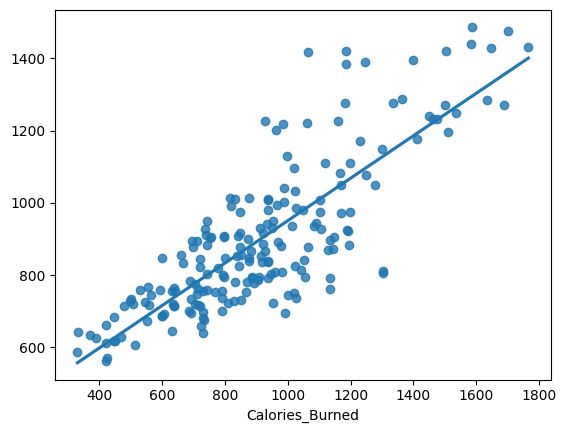

In [476]:
sns.regplot(x= y_test, y=y_pred, ci=None, )